In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [82]:
import os 
path = ('/Users/gabriel/Desktop/Students_Project/Student-Marks-Project')
os.chdir(path)

In [83]:
df = pd.read_csv('Final_Students.csv')
df.head(3)

,gender,lunch,test preparation course,Group A,Group B,Group C,Group D,Group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Target
0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.67
1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,82.33
2,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92.67


In [84]:
df.columns

Index(['gender', 'lunch', 'test preparation course', 'Group A', 'Group B',
       'Group C', 'Group D', 'Group E', 'associate's degree',
       'bachelor's degree', 'high school', 'master's degree', 'some college',
       'some high school', 'Target'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text yticklabel objects>)

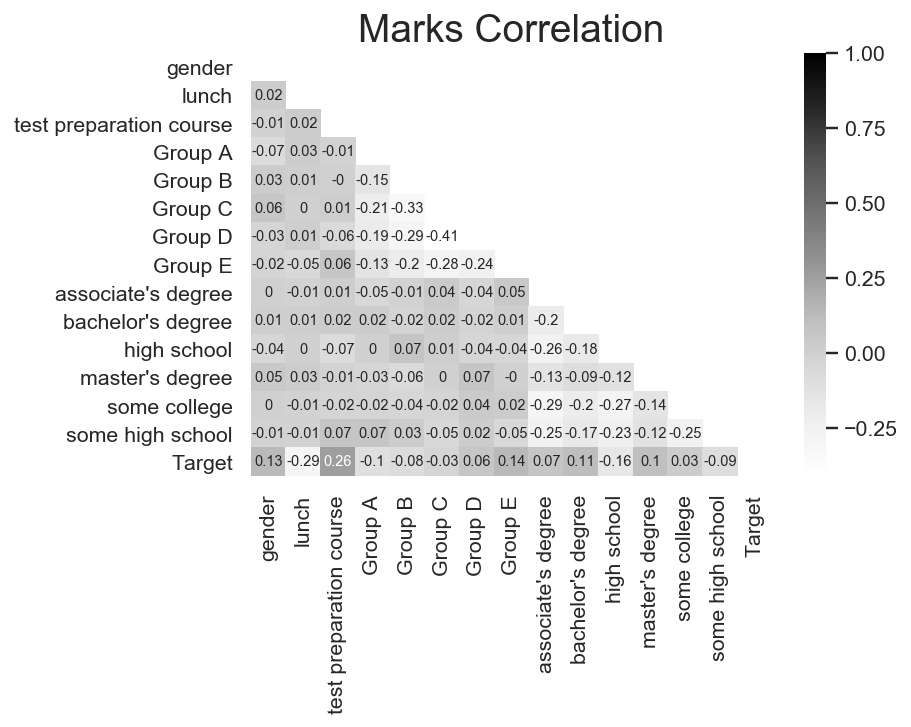

In [85]:
correlation = df.corr().round(2)
sns.set_style(style = 'white')
mask = np.triu(np.ones_like(correlation,dtype = bool))

plt.figure(dpi = 140)
sns.heatmap(correlation,mask = mask, annot = True,annot_kws={"size": 7.5}, cmap = 'Greys')
plt.title('Marks Correlation',fontsize = 20)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [86]:
targets = df['Target']
inputs = df.iloc[:,:-1]

# Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression 

In [88]:
reg = LinearRegression().fit(inputs,targets)

In [107]:
reg.score(inputs,targets).round(2)*100

24.0

Very poor result for the linear regression. We should not consider it

# Logistic regression

In [90]:
targets.median()

68.33

In [91]:
ntargets = np.where(targets>targets.median(),1,0) #Where targets are greater than the median,1, else 0.

In [92]:
ntargets = pd.DataFrame(ntargets, columns = ['Targets'])
ntargets.shape

(1000, 1)

In [93]:
ntargets.head()

,Targets
0,1
1,1
2,1
3,0
4,1


In [94]:
print(ntargets.sum()/ntargets.shape[0]) #49% to 51% distribution

Targets    0.498
dtype: float64


In [95]:
logitdf = pd.concat([inputs,ntargets],axis =1)
logitdf.head()

,gender,lunch,test preparation course,Group A,Group B,Group C,Group D,Group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Targets
0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
reglogit = LogisticRegression()

In [98]:
reglogit.fit(inputs,ntargets)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
reglogit.score(inputs,ntargets).round(2)*100

67.0

Poor performance by the logit regression too, althought significantly higher than linear regression